## Mean-Volatility Modeling

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2018-01-01'
data = yf.download(
    '^GSPC',
    start = start_date,
    interval = '1wk',
    progress = False
)

In [32]:
ret = data['Close'].pct_change().dropna()
ret.head()

Date
2018-01-08    0.015708
2018-01-15    0.008635
2018-01-22    0.022265
2018-01-29   -0.038547
2018-02-05   -0.051620
Name: Close, dtype: float64

### 1. AR-GARCH Model

In [42]:
import statsmodels.api as sm

ar = sm.tsa.ARIMA(
    ret, 
    order = (1, 0, 0)
).fit()

In [43]:
print(ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  350
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 778.580
Date:                Fri, 20 Sep 2024   AIC                          -1551.161
Time:                        01:38:23   BIC                          -1539.587
Sample:                    01-08-2018   HQIC                         -1546.554
                         - 09-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      1.651      0.099      -0.000       0.005
ar.L1         -0.0890      0.033     -2.674      0.007      -0.154      -0.024
sigma2         0.0007   2.76e-05     24.827      0.0

In [44]:
a = (ret - ar.fittedvalues) # residual values

In [45]:
import arch 
import warnings
warnings.filterwarnings('ignore')

garch_model1 = arch.arch_model(
    a, vol = 'GARCH', 
    p = 1, q = 1,
    mean = 'AR'
)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 71613412.64003569
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2948.0967071380874
Iteration:      3,   Func. Count:     27,   Neg. LLF: 395.0099403755057
Iteration:      4,   Func. Count:     35,   Neg. LLF: 4299966.395202049
Iteration:      5,   Func. Count:     45,   Neg. LLF: -829.7059526828068
Optimization terminated successfully    (Exit mode 0)
            Current function value: -829.7059535457424
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 5
                           AR - GARCH Model Results                           
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                829.706
Distribution:                  Normal   AIC:                          -1651.41
Method:            Maximum Likeliho

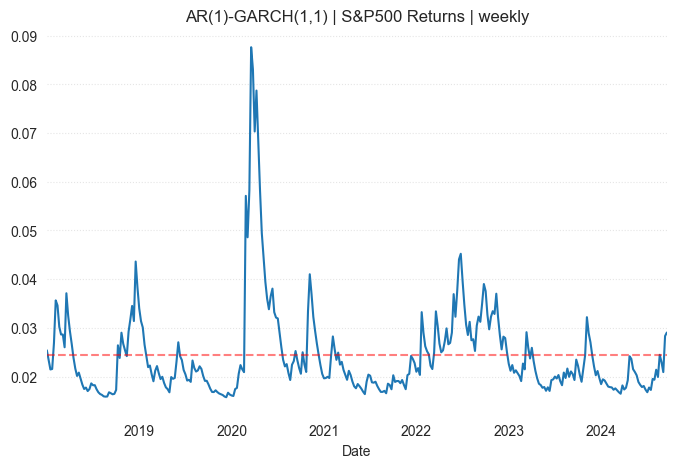

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
result1.conditional_volatility.plot(ax = ax)
plt.axhline(
    result1.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'AR(1)-GARCH(1,1) | S&P500 Returns | weekly')
plt.show()

### 2. ARMA-GARCH Model

In [48]:
import statsmodels.api as sm

arma = sm.tsa.ARIMA(
    ret, 
    order = (1, 0, 1)
).fit()

In [49]:
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  350
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 778.712
Date:                Fri, 20 Sep 2024   AIC                          -1549.425
Time:                        01:41:43   BIC                          -1533.993
Sample:                    01-08-2018   HQIC                         -1543.282
                         - 09-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.002      1.613      0.107      -0.001       0.005
ar.L1         -0.4199      0.267     -1.570      0.116      -0.944       0.104
ma.L1          0.3330      0.280      1.188      0.2

### 3. Fractional Integrated GARCH

#### 3-1. ARMA-FIGARCH

#### 3-2. ARFIMA-FIGARCH